In [2]:
import json
import numpy as np
import logging

from picoscenes import Picoscenes

from packet.PicoscenesData import PicoscenesData
from packet.PacketFormatEnum import PacketFormatEnum
from graph.myPlot import myPlot

In [3]:
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [7]:
pathname = "data/csi/"
# filename = "rx_4_240306_235439.csi" #Static environment
# filename = "rx_4_240307_153338.csi" #Dynamic environment Leo walk
# filename = "rx_4_240308_152729.csi" #盲測
filename = "rx_4_240308_154448.csi" #Johnson walk

# preload for faster testing
preloadData = Picoscenes(pathname + filename)

In [8]:
frames: PicoscenesData = PicoscenesData(pathname + filename)
frames.loadData(preloadData.raw)

frames.filterFormat(PacketFormatEnum.PacketFormat_VHT)
frames.filterBandwidth(40)

sampleSize=2000
result = frames.calAvgMotionStatistic(sampleSize)

2024-03-27 16:59:08,221 - DEBUG - self.data has 117567 item
2024-03-27 16:59:08,250 - DEBUG - self.data only has PacketFormatEnum.PacketFormat_VHT format item, len=117368
2024-03-27 16:59:08,268 - DEBUG - self.data only has 40 bandwidth item, len=117344
2024-03-27 16:59:08,269 - WARNING - make sure data's sample rate is correct, and split method


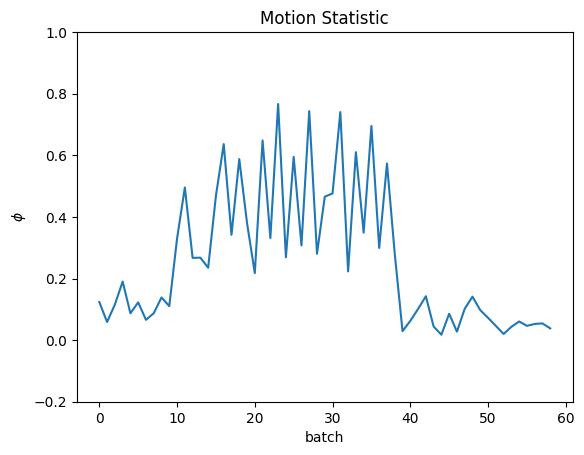

In [9]:
graph = myPlot()
graph.motionGraphByBatch(result)